<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,sklearn,matplotlib

Ethen 2019-03-16 15:22:59 

CPython 3.6.4
IPython 6.4.0

numpy 1.14.2
pandas 0.23.4
sklearn 0.20.2
matplotlib 2.2.3


https://github.com/benmiroglio/pymatch

In [18]:
# https://www.kaggle.com/wendykan/lending-club-loan-data#LCDataDictionary.xlsx
path = 'lending-club-loan-data/loan.csv'

LOAN_AMOUNT = 'loan_amnt'
FUNDED_AMOUNT = 'funded_amnt'
TERM = 'term'
INTEREST_RATE = 'int_rate'
INSTALLMENT = 'installment'
GRADE = 'grade'
LOAN_STATUS = 'loan_status'

fields = [
    "loan_amnt",
    "funded_amnt",
    "term",
    "int_rate",
    "installment",
    "grade",
    # "sub_grade",
    "loan_status"
]
data = pd.read_csv(path, usecols=fields)
print(data.shape)
data.head()

(887379, 7)


,loan_amnt,funded_amnt,term,int_rate,installment,grade,loan_status
0,5000.0,5000.0,36 months,10.65,162.87,B,Fully Paid
1,2500.0,2500.0,60 months,15.27,59.83,C,Charged Off
2,2400.0,2400.0,36 months,15.96,84.33,C,Fully Paid
3,10000.0,10000.0,36 months,13.49,339.31,C,Fully Paid
4,3000.0,3000.0,60 months,12.69,67.79,B,Current


In [19]:
test = data[data.loan_status == "Default"].copy()
control = data[data.loan_status == "Fully Paid"].copy()
test['loan_status'] = 1
control['loan_status'] = 0

In [16]:
data[GRADE].value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

In [20]:
from pymatch.Matcher import Matcher

m = Matcher(test, control, yvar="loan_status", exclude=[])
m.data.head()

Formula:
loan_status ~ loan_amnt+funded_amnt+term+int_rate+installment+grade
n majority: 207723
n minority: 1219


,loan_amnt,funded_amnt,term,int_rate,installment,grade,loan_status
0,18000.0,18000.0,60 months,17.27,449.97,D,1
1,21250.0,21250.0,60 months,14.27,497.43,C,1
2,5600.0,5600.0,60 months,15.99,136.16,D,1
3,15975.0,15975.0,60 months,20.99,432.09,E,1
4,5000.0,5000.0,60 months,15.99,121.57,D,1


In [10]:
np.random.seed(20170925)

m.fit_scores(balance=True, nmodels=100)

Fitting Models on Balanced Samples: 23\100

/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Fitting Models on Balanced Samples: 100\100
Average Accuracy: 69.33%


/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/links.py:167: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


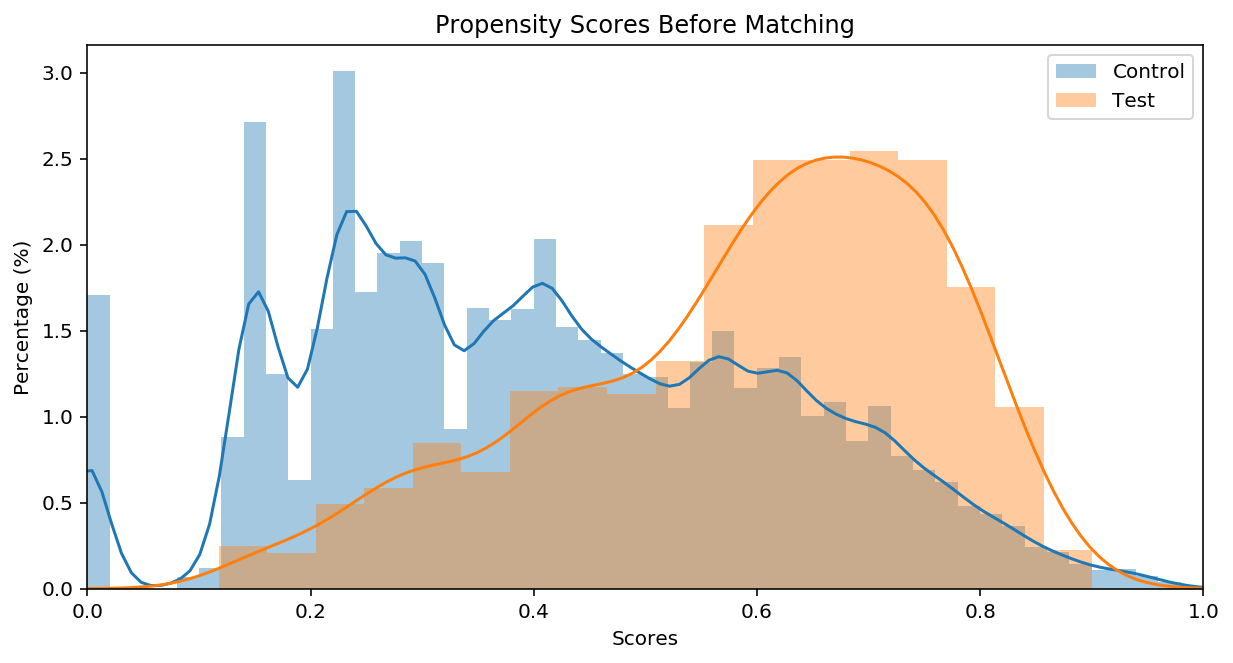

In [11]:
m.predict_scores()
m.plot_scores()

http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets